In [1]:
%matplotlib inline

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams['figure.figsize'] = 20, 10

In [44]:
ds = xr.open_mfdataset('*.nc')

In [45]:
def plot_adcp(dataset, diverge_cmap=False):
    north = ds.northward_seawater_velocity.values
    east = ds.eastward_seawater_velocity.values
    up = ds.upward_seawater_velocity.values
    times = ds.time.values
    bins = ds.bin_depths.values
    concat = np.concatenate((north, east))
#     vmin = np.nanpercentile(concat, 5)
#     vmax = np.nanpercentile(concat, 95)
#     bothmax = max(abs(vmin), abs(vmax))
    vmax = np.nanpercentile(np.abs(concat), 95)
    vmin = -vmax
    bothmax = vmax
    
    data_arrays = [north, east]
    mean_depths = np.mean(bins, axis=0)
    yticks = np.arange(0, mean_depths.size, 4)
    ylabels = mean_depths[::-4].astype('int')
    xticks = np.arange(0, times.size, 40000)
    xlabels = [str(_)[:19].replace('T', '\n') for _ in times[::40000]]

    fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)
    
    for index, data in enumerate(data_arrays):
        ax = axes[index]
        
        # transpose and flip
        data = np.flipud(data.T)
        
        # plot the data
        if diverge_cmap:
            img = ax.imshow(data, aspect='auto', vmin=-bothmax, vmax=bothmax, interpolation='nearest', cmap='RdBu')
        else:
            img = ax.imshow(data, aspect='auto', vmin=vmin, vmax=vmax, interpolation='nearest')

        ax.set_yticks(yticks)
        ax.set_yticklabels(ylabels)
        ax.set_xticks(xticks)
        ax.set_xticklabels(xlabels, rotation=60)

        tick_locator = ticker.MaxNLocator(nbins=6)
        div = make_axes_locatable(ax)
        cax = div.append_axes("right", size="3%", pad=0.05)
        cbar = plt.colorbar(img, cax=cax)
        cbar.locator = tick_locator
        cbar.update_ticks()
        
def plot_adcp2(dataset):
    time = ds.time.values
    bins = ds.bin_depths.values.T
    north = ds.northward_seawater_velocity.values.T
    east = ds.eastward_seawater_velocity.values.T
    
    p_data = [np.flipud(north), np.flipud(east)]
    bins = np.flipud(bins)
    horizontal_data = np.concatenate((north, east))
    lim = float("%2.2f" % np.nanpercentile(abs(horizontal_data), 95))

    fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)
    y_formatter = ticker.ScalarFormatter(useOffset=False)
    plt.axis([time.min(), time.max(), bins.max(), bins.min()])
    plt.locator_params(nbins=5)
    tick_locator = ticker.MaxNLocator(nbins=6)
    # need to add label to y axis
    for i, ax in enumerate(axes.flat):
        z_data = p_data[i]
        
        if i < 2:
            img = ax.pcolormesh(time, bins, p_data[i], vmin=-lim, vmax=lim, cmap=plt.get_cmap('jet'))
        elif i >= 2:
            tlim = np.nanpercentile(abs(p_data[i]), 90)
            img = ax.pcolormesh(time, bins, p_data[i], vmin=-tlim, vmax=tlim, cmap=plt.get_cmap('jet'))

        div = make_axes_locatable(ax)
        cax = div.append_axes("right", size="3%", pad=0.05)
        cbar = plt.colorbar(img, cax=cax)
        cbar.locator = tick_locator
        cbar.update_ticks()

def plot_adcp3(dataset):
    vars = ['northward_seawater_velocity', 'eastward_seawater_velocity']

    fig, axes = plt.subplots(nrows=len(vars), ncols=1, sharex=True, sharey=True)
    
    for index, name in enumerate(vars):
        ax = axes[index]
        dataset[name].T.plot.pcolormesh(x='time', y='bin', ax=ax, center=0, vmax=0.3)

0.665639348698


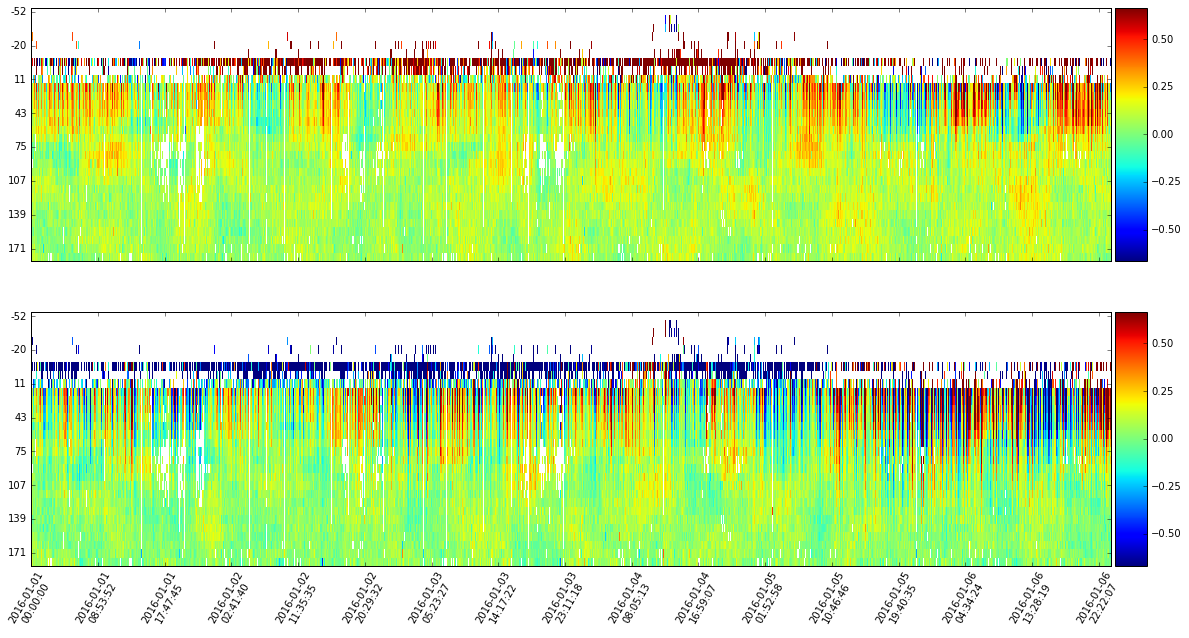

In [46]:
plot_adcp(ds)

0.67


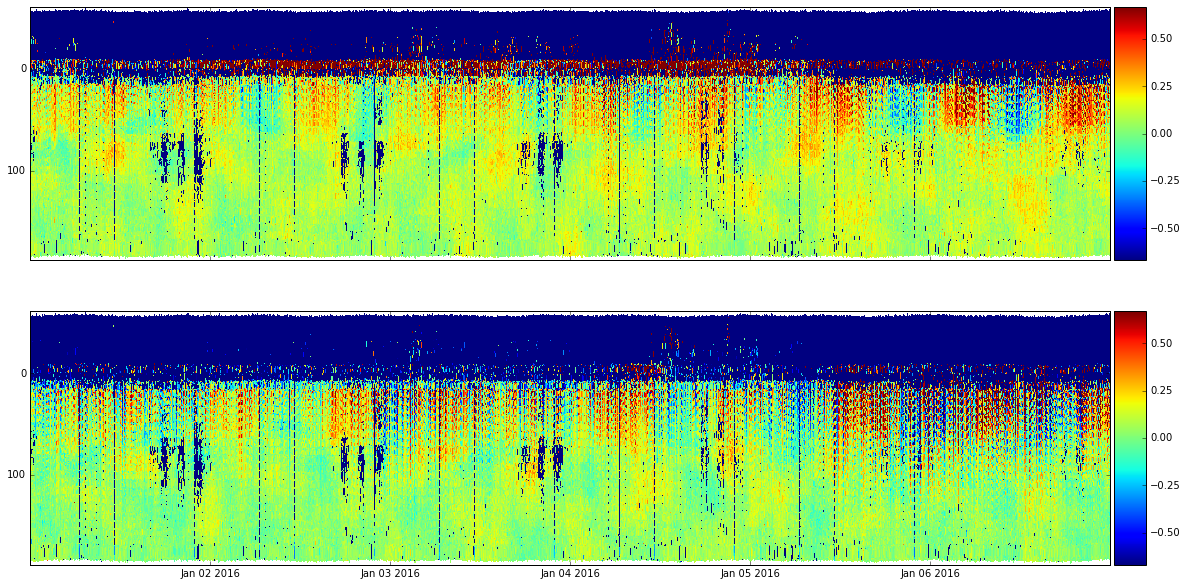

In [47]:
plot_adcp2(ds)

0.665639348698


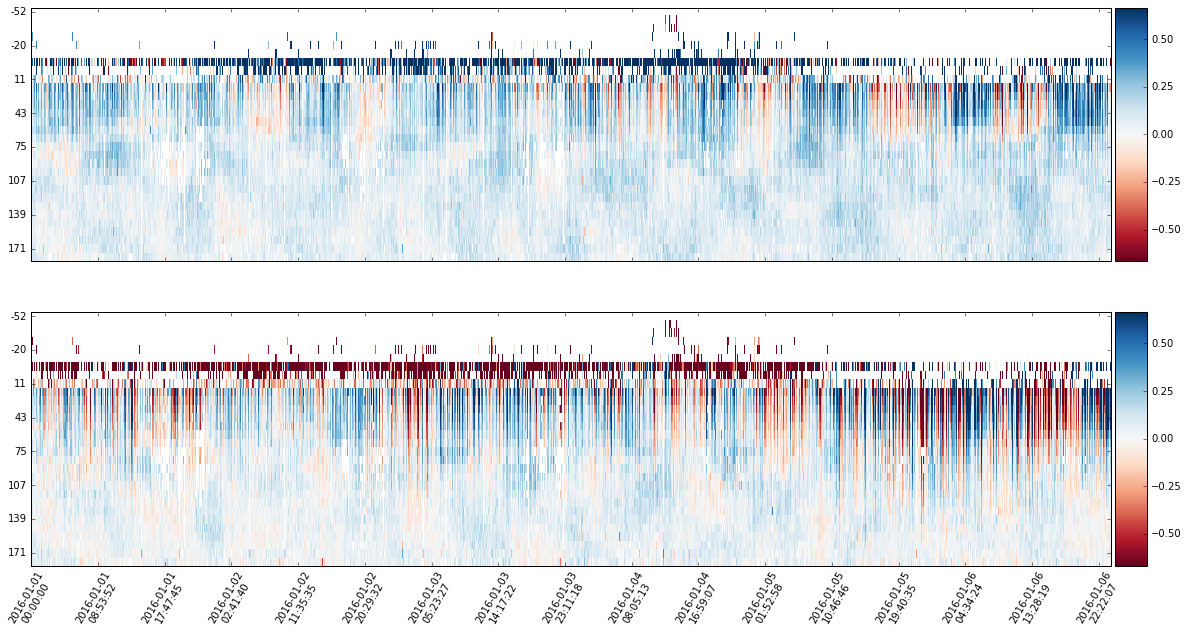

In [48]:
plot_adcp(ds, diverge_cmap=True)

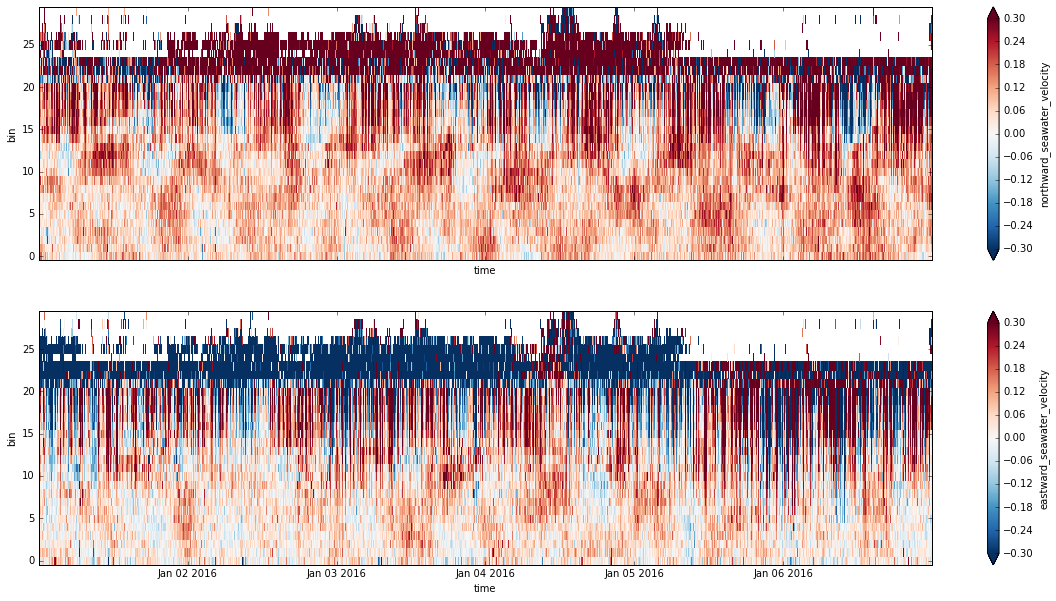

In [49]:
plot_adcp3(ds)